
# 10.4 Efficient Sequence Modeling using GRU



## Motivation for GRU

Traditional recurrent neural networks update their hidden state at each time step using a simple nonlinear transformation. While this design allows RNNs to process sequences of arbitrary length, it suffers from the vanishing gradient problem during training. As gradients are propagated backward through time, they may shrink exponentially, making it difficult for the network to learn dependencies over long sequences.

LSTM networks address this issue by introducing memory cells and multiple gating mechanisms. However, LSTMs involve a relatively complex architecture with a larger number of parameters, which can increase training time and computational cost.

The GRU was proposed as a simpler alternative that retains the ability to capture long-term dependencies while reducing architectural complexity. By combining the cell state and hidden state into a single representation and using fewer gates, GRUs offer an efficient and effective solution for sequence modeling tasks.

Basic Recurrent Neural Networks (RNNs) process sequential data by maintaining a
hidden state. However, they struggle to learn long-term dependencies due to the
**vanishing gradient problem**.

To overcome this limitation, gated architectures were introduced. The **GRU**
is a simplified gated model that efficiently captures long-range dependencies
while requiring fewer parameters than LSTM.



## GRU Architecture Overview

The Gated Recurrent Unit (GRU) architecture is designed to regulate the flow of information in sequential data through the use of gating mechanisms. These gates enable the model to selectively retain or discard information from previous time steps, allowing it to model both short-term and long-term dependencies effectively.

Unlike Long Short-Term Memory (LSTM) networks, which maintain separate cell states and hidden states, the GRU merges both into a single hidden state. This unified representation reduces architectural complexity while still preserving the model’s ability to capture temporal patterns. As a result, GRUs are computationally more efficient and require fewer parameters than LSTMs.

GRU contains:
- **Update Gate**
- **Reset Gate**


The update gate determines how much of the previous hidden state should be carried forward to the current state. It allows the model to preserve important historical information over long sequences, effectively acting as a memory retention mechanism.

The reset gate controls how much past information should be forgotten when computing the new candidate hidden state. By selectively resetting parts of the previous state, the GRU can ignore irrelevant or outdated information, improving its ability to adapt to new inputs.

The diagram illustrates how raw input data undergoes a sequence of transformations before being processed by the GRU. Initial preprocessing stages extract meaningful features from the data, which are then fed into the GRU for sequential learning. The GRU processes these features across time steps, updating its hidden state using the gating mechanisms, and finally produces outputs suitable for prediction or classification tasks.

Overall, the GRU architecture achieves an effective balance between model expressiveness and computational efficiency, making it well suited for a wide range of sequence modeling applications such as time-series analysis, speech processing, and natural language understanding.



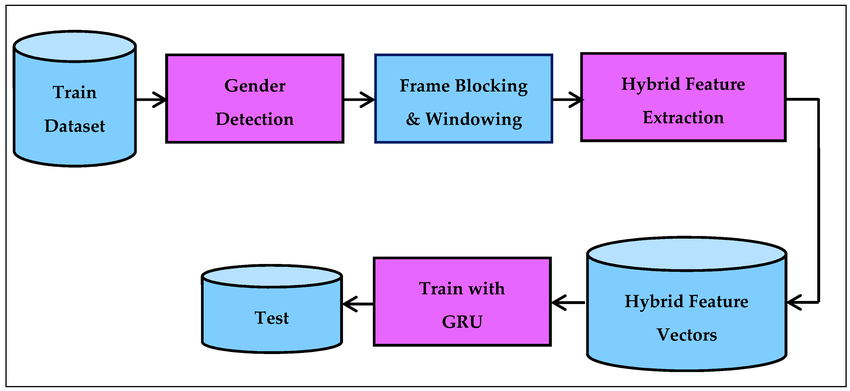



## Intuition Behind GRU Gates

### Update Gate
Controls how much of the previous hidden state is retained, enabling long-term memory.

### Reset Gate
Controls how much past information is forgotten, allowing the model to drop irrelevant history.



## Mathematical Formulation of GRU

Let:
- Input at time step \( t \): \( x_t \)
- Previous hidden state: \( h_{t-1} \)



### Update Gate
$$
z_t = \sigma(W_z x_t + U_z h_{t-1} + b_z)
$$



### Reset Gate
$$
r_t = \sigma(W_r x_t + U_r h_{t-1} + b_r)
$$



### Candidate Hidden State
$$
\tilde{h}_t = \tanh(W_h x_t + U_h (r_t \odot h_{t-1}) + b_h)
$$



### Final Hidden State
$$
h_t = (1 - z_t) \odot h_{t-1} + z_t \odot \tilde{h}_t
$$



## How GRU Captures Long-Term Dependencies

- Update gate preserves relevant information over long sequences  
- Reset gate removes irrelevant context  
- Gradient flow is stabilized  
- Enables efficient long-sequence learning  



## Comparison: GRU vs LSTM

Both GRU and LSTM are designed to overcome the limitations of basic RNNs, but they differ in architectural complexity and parameterization. LSTM networks employ three gates—input, forget, and output gates—along with a dedicated memory cell, providing fine-grained control over information flow. In contrast, GRUs use only two gates and do not maintain a separate cell state.

As a result, GRUs generally have fewer parameters than LSTMs, leading to faster training and reduced memory consumption. In many practical applications, GRUs achieve performance comparable to LSTMs, especially when the available training data is limited. However, for very long and complex sequences, LSTMs may offer slightly better representational capacity due to their more expressive memory structure.

The choice between GRU and LSTM often depends on the specific problem, dataset size, and computational constraints.

| Feature | GRU | LSTM |
|------|-----|------|
| Gates | 2 | 3 |
| Cell state | No | Yes |
| Parameters | Fewer | More |
| Training speed | Faster | Slower |
| Memory control | Moderate | Strong |


## When to Prefer GRU over LSTM

GRUs are preferred in scenarios where computational efficiency and simplicity are important. When working with smaller datasets, GRUs often generalize better due to their reduced parameter count, which lowers the risk of overfitting. They are also suitable when faster training and inference are required, such as in real-time or resource-constrained applications.

In situations where long-range dependencies are present but not extremely complex, GRUs provide an effective balance between performance and efficiency. Their simpler structure makes them easier to tune and deploy, particularly in large-scale sequence modeling tasks.




# Introductory GRU-Based Sequence Modeling Example

This notebook provides a **simple and illustrative example** of how a
**Gated Recurrent Unit (GRU)** can be used for sequence modeling tasks.
The emphasis is on conceptual understanding and workflow.



## Model Architecture

The GRU-based model consists of:
- A GRU layer for sequential feature learning
- A Dense output layer for classification


In [ ]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense



## Defining the GRU Model


In [ ]:

model = Sequential([
    GRU(32, input_shape=(None, 10)),
    Dense(1, activation='sigmoid')
])



## Compiling the Model


In [ ]:

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)



## Sample Sequential Data


In [ ]:

import numpy as np

X = np.random.rand(100, 20, 10)
y = np.random.randint(0, 2, size=(100, 1))



## Training the Model


In [ ]:

model.fit(X, y, epochs=5, batch_size=16)



## Interpretation

The GRU processes the sequence one time step at a time, updating its hidden state
using gating mechanisms. This enables the model to learn meaningful temporal
patterns while remaining computationally efficient.



## Applications of GRU

GRUs are commonly used in:
- Time-series forecasting  
- Speech recognition  
- Natural language processing  
- Sensor and IoT data modeling  



## Summary

This chapter presented a detailed study of GRU, including motivation, architecture,
gating intuition, mathematical formulation, and practical applications.
GRU offers an efficient and powerful alternative to LSTM for sequential modeling.

## Task for the Reader

1.Explain the motivation for introducing GRU over basic recurrent neural networks.

2.Describe the role of update and reset gates in the GRU architecture.

3.Compare GRU and LSTM in terms of structure, complexity, and performance.

4.Identify scenarios where GRU is preferred over LSTM and justify your answer.

5.Explain how a GRU processes sequential data in a simple sequence modeling task.

